In [90]:
import pandas as pd
import requests

import statsmodels
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [89]:
import scipy as sci
import scipy.stats as stats

In [42]:
response = requests.get('http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html')
table = pd.read_html(response.text, encoding='utf-8')

In [43]:
table = table[0]

In [44]:
h_and_w = table.iloc[1:, 1:3].rename(columns = {1:'рост_в_дюймах', 2:'вес_в_фунтах'}).reset_index().drop(columns = 'index')

In [45]:
h_and_w

,рост_в_дюймах,вес_в_фунтах
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.2166,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [46]:
h_and_w.dtypes #Изменим object тип на float

рост_в_дюймах    object
вес_в_фунтах     object
dtype: object

In [47]:
h_and_w = h_and_w.astype(np.float)

C:\Users\CD86~1\AppData\Local\Temp/ipykernel_15480/4046651623.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  h_and_w = h_and_w.astype(np.float)


In [48]:
h_and_w.to_csv('h_and_w.csv') #Сохранимся))

# Переходим к анализу

In [100]:
sns.set_style('darkgrid') # Задаём стиль для будущих графиков

In [101]:
h_and_w = pd.read_csv('h_and_w.csv')
h_and_w = h_and_w.drop('Unnamed: 0', axis=1)

In [102]:
h_and_w.describe().T

,count,mean,std,min,25%,50%,75%,max
рост_в_дюймах,25000.0,67.993114,1.901679,60.27836,66.704397,67.99570,69.272958,75.1528
вес_в_фунтах,25000.0,127.079421,11.660898,78.01476,119.308675,127.15775,134.892850,170.9240


# Анализ распределений

In [103]:
#Добавление колонок связанных с Z-статистикой
h_and_w['z_рост'] = stats.zscore(h_and_w.рост_в_дюймах)
h_and_w['z_вес'] = stats.zscore(h_and_w.вес_в_фунтах)

<AxesSubplot:xlabel='Рост', ylabel='Частота встречаний'>

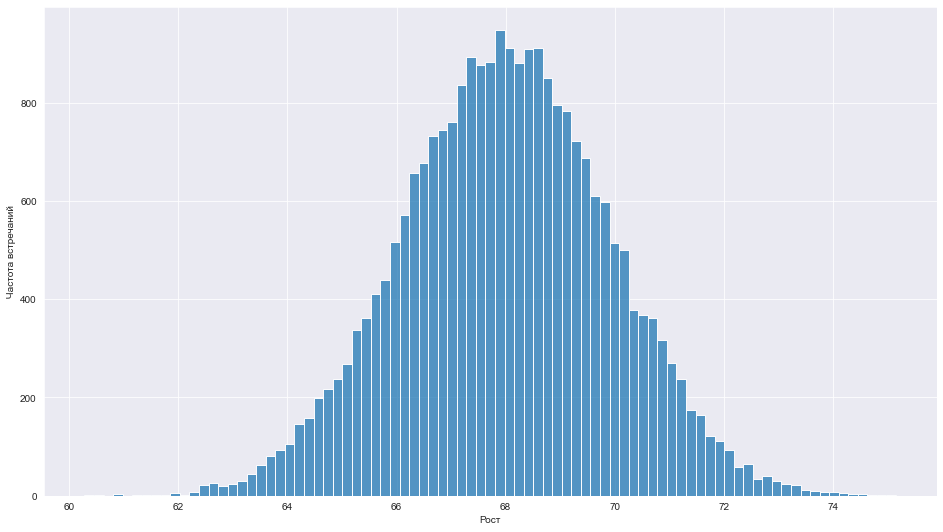

In [104]:
#Строим Гистограмму частот
plt.figure(figsize = (16,9))
plt.xlabel('Рост')
plt.ylabel('Частота встречаний')
sns.histplot(h_and_w.рост_в_дюймах)

<AxesSubplot:ylabel='рост_в_дюймах'>

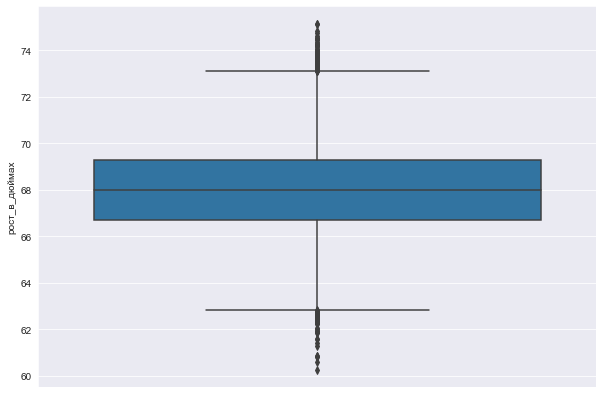

In [105]:
plt.figure(figsize = (10,7))
sns.boxplot(y = h_and_w.рост_в_дюймах)

<AxesSubplot:ylabel='рост_в_дюймах'>

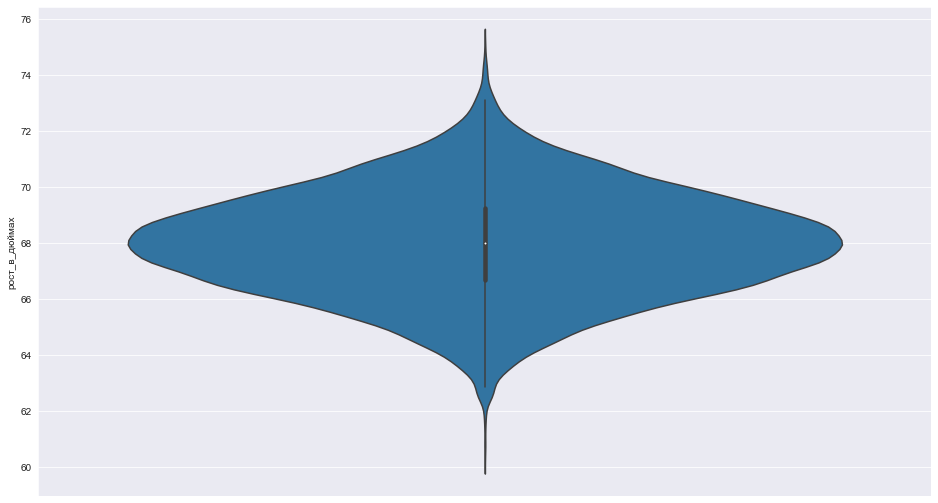

In [106]:
plt.figure(figsize = (16,9))
sns.violinplot(y = h_and_w.рост_в_дюймах)

In [107]:
#Визуально можно утверждать, что Рост распределён по нормальному закону

In [108]:
#Вес проверим на нормальность с помощью теста Шапиро-Вилка
from scipy.stats import shapiro
stat, p = shapiro(h_and_w.вес_в_фунтах)

c:\python\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [109]:
p
#Так как p-value намного больше 0,05 гипотезу о нормальности отвергать нельзя

0.40950363874435425

<AxesSubplot:xlabel='рост_в_дюймах', ylabel='вес_в_фунтах'>

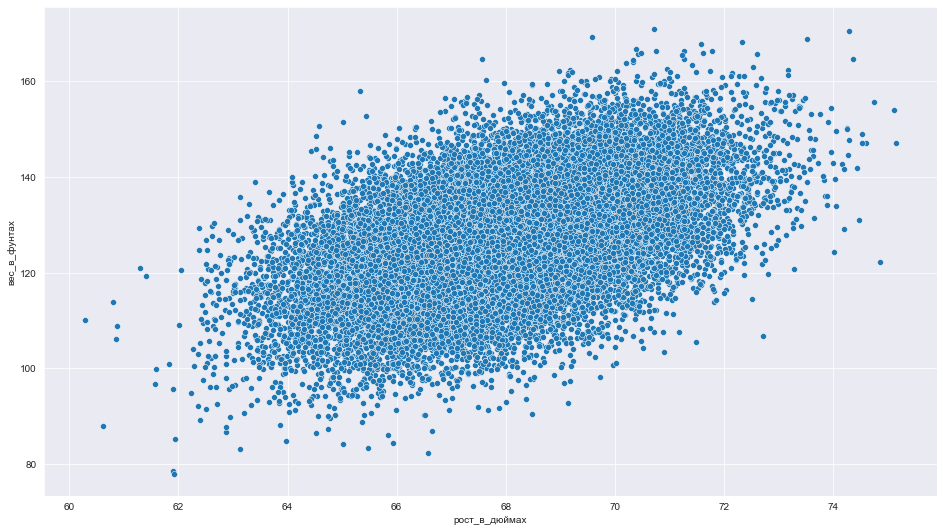

In [110]:
#Очевидно, что есть связь между ростом и весом. Давайте визулизируем это
plt.figure(figsize = (16,9))
sns.scatterplot(data = h_and_w, x = 'рост_в_дюймах', y = 'вес_в_фунтах')

In [111]:
#Расчитаем коэффициент корреляции
h_and_w.рост_в_дюймах.corr(h_and_w.вес_в_фунтах)

#Значение чуть большее 0,5 говорит о среднем уровне зависимости между весом и ростом

0.5028585206028434

# Кусочки кода, которые не пригодились, но потом планирую доработать

In [52]:
from scipy.stats import norm
import statsmodels.api as sm

data_high = np.arange(60,80,0.1)
pdf_high = norm.pdf(data_high , loc = np.mean(h_and_w.рост_в_дюймах), scale = np.std(h_and_w.рост_в_дюймах))
data_weight = np.arange(75,180,0.1)
pdf_weight = norm.pdf(data_weight , loc = np.mean(h_and_w.вес_в_фунтах), scale = np.std(h_and_w.вес_в_фунтах))

sns.set_style('darkgrid') # Задаём стиль для будущих графиков

#sns.lineplot(data_high, pdf_high , color = 'black')
#sns.lineplot(data_weight, pdf_weight , color = 'black')


In [66]:
#Функция для отрисовки несокльких графиков. Работает не оч


def all_functions(data, x_name = None, y_name= None, title = None):
    plt.figure(figsize = (10,20))
    fig, axs = plt.subplots(nrows= 4 , ncols= 1 )

    fig.suptitle(title) #название всем графикам

    #add data to plots
    plt.subplot (4, 1, 1)
    sns.histplot(data)
    plt.subplot (4, 1, 2)
    sns.boxplot(y = data)
    plt.subplot (4, 1, 3)
    sns.violinplot(y = data)
    #plt.subplot (2, 2, 4)
    sm.qqplot(data)
    
    plt.show()
    return